## Import libraries

In [32]:
import numpy as np #linear algebra
import pandas as pd #data structures & processing
pd.set_option("display.max_columns", None) #to make sure all columns are displayed

#visualization
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import seaborn as sns

from collections import Counter

#suppress warnings
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

## Load the data

In [33]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## First look

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
train.info()
print("Features: ", train.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Features:  ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## Splitting features 
Categorical: Pclass (passenger class), Name, Sex, Ticket, Cabin, Embarked
<br> Numerical: Age, SibSp (no. of siblings/spouses), Parch (no. of parents/children), Fare (ticket price)

We can see a lot of missing values:
* Age (177),
* Cabin (687),
* Embarked (2).

## Dropping features

In [36]:
train.drop(columns = ["PassengerId"], inplace = True) 
#inplace = True returns None, inplace = False returns a copy of the object with the operation performed

I suspect that Name and Ticket features won't be useful.

In [37]:
train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Silvey, Mrs. William Baird (Alice Munger)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


Quick explanation:
*  **top** - most commonly occuring value, 
* **freq** - frequency (or count of occurance) of most commonly occuring value.

In [38]:
train["Name"][0:50]

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

We could leave the titles and make it a new feature - let's leave Name feature for now.

In [39]:
train["Ticket"][0:50]

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
20              239865
21              248698
22              330923
23              113788
24              349909
25              347077
26                2631
27               19950
28              330959
29              349216
30            PC 17601
31            PC 17569
32              335677
33          C.A. 24579
34            PC 17604
35              113789
36                2677
37          A./5. 2152
38              345764
39                2651
40                7546
41               11668
42              349253
43       SC

I can't see any interesting patterns.

In [40]:
train.drop(columns = ["Ticket"], inplace = True)

## Fixing missing values

In [41]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [42]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
#nulls to NaN
train.fillna(np.nan, inplace = True) 
test.fillna(np.nan, inplace = True)

What about Cabin feature? Let's a closer look.


In [44]:
train["Cabin"][0:50]

0             NaN
1             C85
2             NaN
3            C123
4             NaN
5             NaN
6             E46
7             NaN
8             NaN
9             NaN
10             G6
11           C103
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            D56
22            NaN
23             A6
24            NaN
25            NaN
26            NaN
27    C23 C25 C27
28            NaN
29            NaN
30            NaN
31            B78
32            NaN
33            NaN
34            NaN
35            NaN
36            NaN
37            NaN
38            NaN
39            NaN
40            NaN
41            NaN
42            NaN
43            NaN
44            NaN
45            NaN
46            NaN
47            NaN
48            NaN
49            NaN
Name: Cabin, dtype: object

Looks like we could leave first letter only and maybe fill missing ones with special value X.

In [45]:
def fix_cabins(data):
    data["Cabin"] = [i[0] if not pd.isna(i) else 'X' for i in data["Cabin"]]

fix_cabins(train)
fix_cabins(test)

For the rest of the features let's pursue a following strategy to not dump tons of data:
* for numerical features - change NaN to median,
* for categorical features - change NaN to mode.

In [46]:
def fill_missing(data):
    #isnull() returns True if value is NaN or None etc.
    #sum() returns an array (column, count)
    missing = data.isnull().sum()
    missing = missing[missing > 0] #using a mask

    for column in list(missing.index):
        if data[column].dtype == "object":
            data[column].fillna(data[column].value_counts().index[0], inplace = True)
        else:
            data[column].fillna(data[column].median(), inplace = True)

fill_missing(train)
fill_missing(test)

After filling missing values:

In [50]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [51]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Exploratory Data Analysis (EDA)

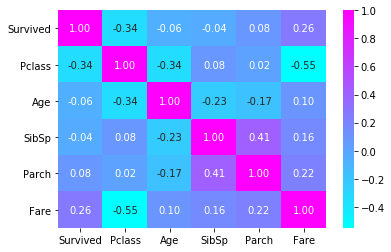

In [56]:
g = sns.heatmap(train.corr(), annot = True, cmap = "cool", fmt = ".2f")
#enhanced correlation matrix between numerical feautures and Survived using Pearson coefficient

Correlations (abs ascending):
* Survived - Fare
* Survived - Pclass
* Parch - SibSp
* Pclass - Fare

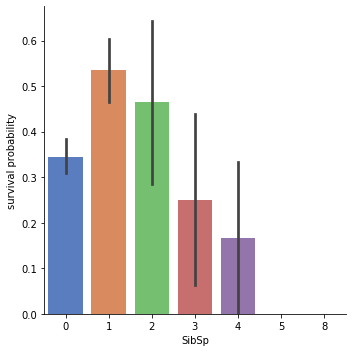

In [61]:
g = sns.catplot(x = "SibSp", y = "Survived", data = train, kind = "bar", palette = "muted")
#A catplot shows the relationship between a numerical and one or more categorical variables
#A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle 
#and provides some indication of the uncertainty around that estimate using error bars.
g = g.set_ylabels("survival probability")

Looks like small/regular families were the most likely to survive. Big families and people travelling alone were less likely to survive. 

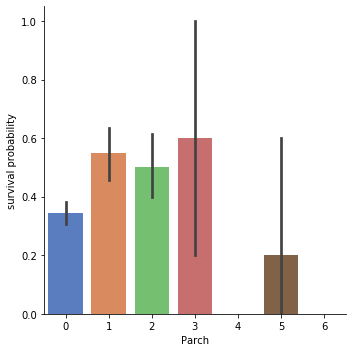

In [62]:
g  = sns.catplot(x = "Parch", y = "Survived", data = train, kind = "bar", palette = "muted")
g = g.set_ylabels("survival probability")

The same. Maybe couples with 3 children was prioritized to get on a rescue boat first.